In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
root = '/mnt/c/Users/tsimk/Downloads/dotfiles'
msk_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_msk_/city_clrd0000.gl5'
pop_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/pop_tot_/GPW4ag__20100000.gl5'
ara_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/lnd_ara_/lndara.CAMA.gl5'
msk = np.fromfile(msk_path, dtype='float32').reshape(2160, 4320)
pop = np.fromfile(pop_path, dtype='float32').reshape(2160, 4320)
ara = np.fromfile(ara_path, dtype='float32').reshape(2160, 4320)
print(np.min(pop))
print(np.max(pop))
print(np.min(ara))
print(np.max(ara))

0.0
3374081.0
9583888.0
1e+20


In [3]:
density = (pop / (ara/10**6))
density_masked = np.ma.masked_where(ara == 1e20, density)
print(np.min(density))
print(np.max(density))

ara_masked = np.ma.masked_where(ara == 1e20, ara)
print(np.min(ara_masked)) # m2 = km2(1e6) 北極とかで9km2くらい
print(np.max(ara_masked)) # 赤道で85km2くらい

0.0
45522.528334462695
9583888.0
85479624.0


In [4]:
city_num = 1
tmp = np.ma.masked_where(msk!=city_num, density_masked)
grid_num = np.sum(np.where(msk==city_num, 1, 0))
valid_values = tmp.compressed()
count_below_1500 = np.sum(valid_values < 1500)

coord = np.where((~tmp.mask) & (tmp < 1500))
ara_below_1500 = np.sum(ara[coord])/1e6 # km2
pop_below_1500 = np.sum(pop[coord]) # person
rate = count_below_1500/grid_num # %

print(np.min(tmp))
print(np.max(tmp))
print(f'grid_num: {grid_num}')
print(f"1500未満のグリッド数: {count_below_1500}")
print(f'popdiff: {pop_below_1500}')
print(f'rate_of_grid_below_1500person_per_square_kilometer: {rate}')
print(f'aradiff: {ara_below_1500}') #km2

1141.7853799166542
16841.121315658173
grid_num: 93
1500未満のグリッド数: 12
popdiff: 1091235.25
rate_of_grid_below_1500person_per_square_kilometer: 0.12903225806451613
aradiff: 836.567872


In [ ]:
grid_list = []
lower_list = []
rate_list = []
aradiff_list = []
popdiff_list = []

for city_num in range(1, 1861):
    grid_num = np.sum(np.where(msk==city_num, 1, 0))
    if grid_num > 0:
        city_density = np.ma.masked_where(msk!=city_num, density_masked)
        valid_citydensity = city_density.compressed()
        count_below_1500 = np.sum(valid_citydensity < 1500)
        
        coord = np.where((~city_density.mask) & (city_density < 1500))
        ara_below_1500 = np.sum(ara[coord])/1e6 # km2
        pop_below_1500 = np.sum(pop[coord]) # person
        rate = count_below_1500/grid_num # %
        
        print(f'max: {np.min(city_density)}')
        print(f'min: {np.max(city_density)}')
        print(f'grid_num: {grid_num}')
        print(f"1500未満のグリッド数: {count_below_1500}")
        print(f'popdiff: {pop_below_1500}')
        print(f'rate: {rate}')
        grid_list.append(grid_num)
        lower_list.append(count_below_1500)
        rate_list.append(rate)
        popdiff_list.append(pop_below_1500)
        aradiff_list.append(ara_below_1500)
    else:
        grid_list.append('NA')
        lower_list.append('NA')
        rate_list.append('NA')
        popdiff_list.append('NA')
        aradiff_list.append('NA')
    print('--------------------')

max: 1141.7853799166542
min: 16841.121315658173
grid_num: 93
1500未満のグリッド数: 12
popdiff: 1091235.25
rate: 0.12903225806451613
--------------------
max: 2184.0127240339007
min: 28526.19350122793
grid_num: 39
1500未満のグリッド数: 0
popdiff: 0.0
rate: 0.0
--------------------
max: 2381.7587550498047
min: 28648.00630804042
grid_num: 33
1500未満のグリッド数: 0
popdiff: 0.0
rate: 0.0
--------------------
max: 793.9016216069939
min: 18870.781122797594
grid_num: 43
1500未満のグリッド数: 8
popdiff: 662619.6875
rate: 0.18604651162790697
--------------------
max: 1305.870298423111
min: 13125.609181413065
grid_num: 34
1500未満のグリッド数: 3
popdiff: 317211.6875
rate: 0.08823529411764706
--------------------
max: 2681.041226304647
min: 11868.859008485899
grid_num: 24
1500未満のグリッド数: 0
popdiff: 0.0
rate: 0.0
--------------------
max: 904.4214481526686
min: 17594.500141246503
grid_num: 62
1500未満のグリッド数: 19
popdiff: 1401133.125
rate: 0.3064516129032258
--------------------
max: 7512.829200707752
min: 31787.204162962767
grid_num: 13
150

In [46]:
text_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/create_text/camacity_fifth.txt'
columns = ['city_code', 'rank', 'status', 'type', 'latitude', 'longitude', 'city_name', 'wup_pop', '5region_code', '5region_name', '17region_code', '17region_name', '22region_code', '22region_name', 'country_code', 'country_name', 'full_pop', 'clustered_pop', 'grids', 'administrative_level', 'input_size', 'Mcdonald2014', 'mainriver_count', 'distance', 'precision']
df_fifth = pd.read_csv(text_path, sep="|", header=None, names=columns)
df_fifth.head(5)

,city_code,rank,status,type,latitude,longitude,city_name,wup_pop,5region_code,5region_name,...,country_name,full_pop,clustered_pop,grids,administrative_level,input_size,Mcdonald2014,mainriver_count,distance,precision
0,21671,1,VALD,DOWN,35.689500,139.691710,Tokyo,36859.626,142,Asia,...,Japan,36855016.0,31821846.0,93.0,2,1751,True,4,63.190001173755135,0.817204
1,21228,2,VALD,FULL,28.666670,77.216670,Delhi,21987.895,142,Asia,...,India,22058268.0,22058266.0,39.0,3,5967,True,1,56.49560136366978,0.692308
2,20656,3,VALD,DOWN,31.222220,121.458060,Shanghai,20314.309,142,Asia,...,China,20277882.0,18339050.0,33.0,4,43878,True,3,99.83997662537448,0.969697
3,21853,4,VALD,FULL,19.427318,-99.141869,Ciudad de México (Mexico City),20136.681,19,Americas,...,Mexico,20178100.0,20178102.0,43.0,3,73613,True,2,98.71405766412326,0.860465
4,20287,5,VALD,DOWN,-23.547500,-46.636110,São Paulo,19659.808,19,Americas,...,Brazil,19608378.0,18857166.0,34.0,5,316461,True,1,92.87613267803071,0.911765


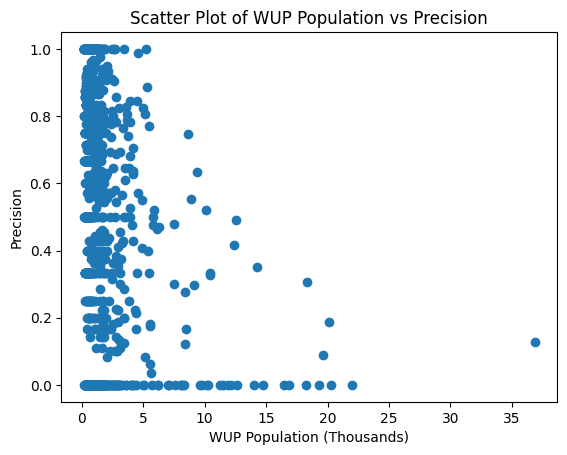

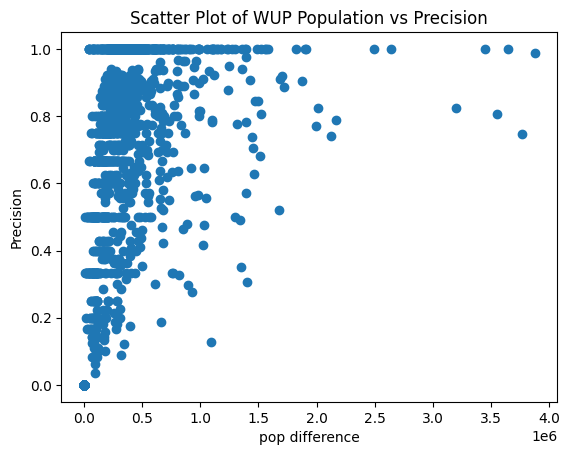

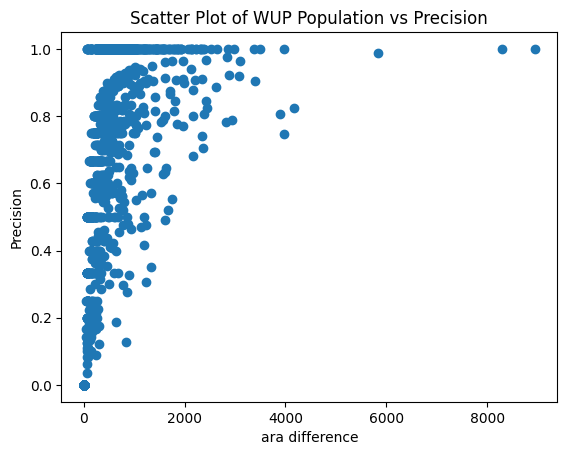

In [47]:
rate_series = pd.Series(rate_list)
popdiff_series = pd.Series(popdiff_list)
aradiff_series = pd.Series(aradiff_list)
valid_indices = rate_series != 'NA' 
valid_wup_pop = df_fifth.loc[valid_indices, 'wup_pop'] / 1e3  # 有効な wup_pop を取得
valid_rate_list = rate_series[valid_indices].astype(float)
valid_pop_list = popdiff_series[valid_indices].astype(float)
valid_ara_list = aradiff_series[valid_indices].astype(float)

plt.scatter(valid_wup_pop, valid_rate_list)
plt.xlabel("WUP Population (Thousands)")
plt.ylabel("Precision")
plt.title("Scatter Plot of WUP Population vs Precision")
plt.show()

plt.scatter(valid_pop_list, valid_rate_list)
plt.xlabel("pop difference")
plt.ylabel("Precision")
plt.title("Scatter Plot of WUP Population vs Precision")
plt.show()

plt.scatter(valid_ara_list, valid_rate_list)
plt.xlabel("ara difference")
plt.ylabel("Precision")
plt.title("Scatter Plot of WUP Population vs Precision")
plt.show()

In [50]:
savetext = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt'

def write_text(save_path, index, rate, ara_diff, pop_diff, true, gridsize):
    if index == 1:
        with open(save_path, 'w') as file:
            file.write(f"{index}|{rate}|{ara_diff}|{pop_diff}|{true}|{gridsize}\n")
    else:
        with open(save_path, 'a') as file:
            file.write(f"{index}|{rate}|{ara_diff}|{pop_diff}|{true}|{gridsize}\n")
    print(index, save_path)

for i in range(1, 1861):
    ind = i-1
    write_text(savetext, i, rate_list[ind], aradiff_list[ind], popdiff_list[ind], lower_list[ind], grid_list[ind])

1 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
2 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
3 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
4 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
5 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
6 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
7 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
8 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
9 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
10 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
11 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_precision.txt
12 /mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/dou_pre